In [8]:
# Week 4 : Decision Trees
# Load Data : Ear shape, Face shape, Whiskers
X_train = np.array([[1,1,1],
[0, 0, 1],
 [0, 1, 0],
 [1, 0, 1],
 [1, 1, 1],
 [1, 1, 0],
 [0, 0, 0],
 [1, 1, 0],
 [0, 1, 0],
 [0, 1, 0]])

y_train = np.array([1, 1, 0, 0, 1, 1, 0, 1, 0, 0 ])

# Define function of entropy
def entropy(p):
    if p==0 or p==1:
        return 0
    else: 
        return -p * np.log2(p) - (1-p)*np.log2(1-p)
print(entropy(0.5))

# Information Gain
def split_indices(X, index_feature):
    """Given a dataset and a index feature, return two lists for the two split nodes, the left node has the animals that have 
    that feature = 1 and the right node those that have the feature = 0 
    index feature = 0 => ear shape
    index feature = 1 => face shape
    index feature = 2 => whiskers
    """
    left_indices = []
    right_indices = []
    for i,x in enumerate(X):
        if x[index_feature] == 1:
            left_indices.append(i)
        else:
            right_indices.append(i)
    return left_indices, right_indices

split_indices(X_train,0)

def weighted_entropy(X,y,left_indices,right_indices):
    """
    This function takes the splitted dataset, the indices we chose to split and returns the weighted entropy.
    """
    w_left = len(left_indices)/len(X)
    w_right = len(right_indices)/len(X)
    p_left = sum(y[left_indices])/len(left_indices)
    p_right = sum(y[right_indices])/len(right_indices)
    
    weighted_entropy = w_left * entropy(p_left) + w_right * entropy(p_right)
    return weighted_entropy

left_indices, right_indices = split_indices(X_train, 0)
weighted_entropy(X_train, y_train, left_indices, right_indices)

1.0


0.7219280948873623

In [1]:
!pip install numpy

In [12]:
import numpy as np
a = np.zeros(4)           # 1
print(a)
b = np.random.randn(6)    # 2
print(b)
c = np.arange(7)          # 3
print(c)
d = np.array([5,4,3,2,1]) # 4
print(d)
e = b[2]                  # 5
print(e)

[0. 0. 0. 0.]
[ 0.84202273 -1.35131762  0.11113437 -1.21728796 -0.19122027  0.44282016]
[0 1 2 3 4 5 6]
[5 4 3 2 1]
0.11113436958603423


In [15]:
import numpy as np
a = np.array([1,2,3,4]) # 1

b = np.sum(a)           # 2
print(b)

c = np.mean(a)          # 3
print(c)

d = a**2                # 4
print(d)

10
2.5
[ 1  4  9 16]


In [19]:
a = np.array([1,2,3,4])
b = np.array([-1,4,3,2])
c = np.dot(a,b)
print(c)

24


In [26]:
!pip install matplotlib

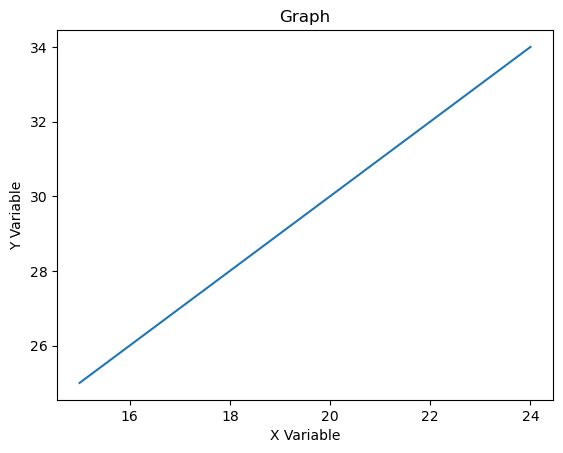

In [35]:
from matplotlib import pyplot as plt

x = list(range(15,25))
y = list(range(25,35))

plt.title("Graph")
plt.xlabel("X Variable")
plt.ylabel("Y Variable")
plt.plot(x, y)

In [47]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1,784).astype("float32") / 255
y_test = x_test.reshape(-1,784).astype("float32") / 255

# Sequential API ( Very convenient, not very flexible)
model = keras.Sequential(
    [
        keras.Input(shape=(28*28)),
        layers.Dense(512, activation = 'relu'),
        layers.Dense(256, activation= 'relu'),
        layers.Dense(10),
    ]
) 

# model.compile(
#     loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#     optimizer=keras.optimizers.Adam(lr=0.001),
#     metrics=["accuracy"],
# )

# model.fit(x_train, y_train, batch_size = 32, epochs=5, verbose=2)
# model.evaluate(x_test, y_test,batch_size=32, verbose=2)

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dense_8 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________
None
